# Jellyfish Database Initiative: Global records on gelatinous zooplankton for the past 200 years, collected from global sources and literature (Trophic BATS project)
https://www.bco-dmo.org/dataset/526852#data-files



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv("../data/JeDI.csv")

/tmp/ipykernel_22183/795111168.py:5: DtypeWarning: Columns (7,8,22,23,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("JeDI.csv")


In [2]:

# 2. Quick inspection
print(df.head())
print(df.info())

# 3. Replace "nd" with NaN for easier handling
df = df.replace("nd", pd.NA)

  project_title sub_project_title owner_dataset  contact  \
0   AdriaticSea       AdriaticSea       Malej_A  Malej_A   
1   AdriaticSea       AdriaticSea       Malej_A  Malej_A   
2   AdriaticSea       AdriaticSea       Malej_A  Malej_A   
3   AdriaticSea       AdriaticSea       Malej_A  Malej_A   
4   AdriaticSea       AdriaticSea       Malej_A  Malej_A   

           location_name date  year month day time_local  ...  density  \
0  Northern_Adriatic_Sea   nd  1790    nd  nd         nd  ...       nd   
1  Northern_Adriatic_Sea   nd  1790    nd  nd         nd  ...       nd   
2  Northern_Adriatic_Sea   nd  1790    nd  nd         nd  ...       nd   
3  Northern_Adriatic_Sea   nd  1790    nd  nd         nd  ...       nd   
4  Northern_Adriatic_Sea   nd  1790    nd  nd         nd  ...       nd   

   density_integrated biovolume biovolume_integrated weight_wet weight_dry  \
0                  nd        nd                   nd         nd         nd   
1                  nd        nd       

In [3]:

# 4. Convert numeric columns
numeric_cols = ["year", "month", "day", "lat", "lon",
                "count_actual", "density", "density_integrated",
                "biovolume", "biovolume_integrated",
                "weight_wet", "weight_dry"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 5. Basic summaries
print("Unique taxa:", df["rank_species"].dropna().unique()[:10])
print("Years covered:", df["year"].min(), "to", df["year"].max())

Unique taxa: ['aurita' 'tuberculata' 'pulmo' 'hysoscella' 'noctiluca' 'mosaicus'
 'haeckeli' 'gegenbauri' 'affinis' 'bakeri']
Years covered: 1790 to 2011


In [4]:

# Count records by species
species_counts = df["rank_species"].value_counts().head(10)
print(species_counts)

rank_species
nomurai       14769
sp            11778
cellularia     9574
digitale       9040
gemini         8395
pileus         4325
prolifer       4024
digitalis      4011
producta       3977
arctica        3906
Name: count, dtype: int64


In [5]:

# 6. Temporal trend: number of presence records per year
presence = df[df["presence_absence"] == "present"]
trend = presence.groupby("year").size()

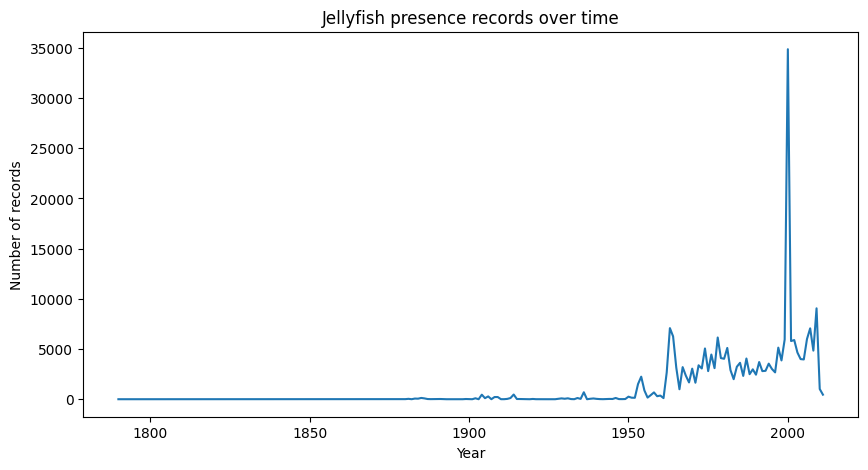

In [6]:

trend.plot(kind="line", figsize=(10,5))
plt.title("Jellyfish presence records over time")
plt.xlabel("Year")
plt.ylabel("Number of records")
plt.show()

/tmp/ipykernel_22183/3111958396.py:7: DtypeWarning: Columns (7,8,22,23,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("JeDI.csv").replace("nd", pd.NA)
/home/salamander/Documents/unirepo-3/env/venv/lib64/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/salamander/Documents/unirepo-3/env/venv/lib64/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/salamander/Documents/unirepo-3/env/venv/lib64/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/sala

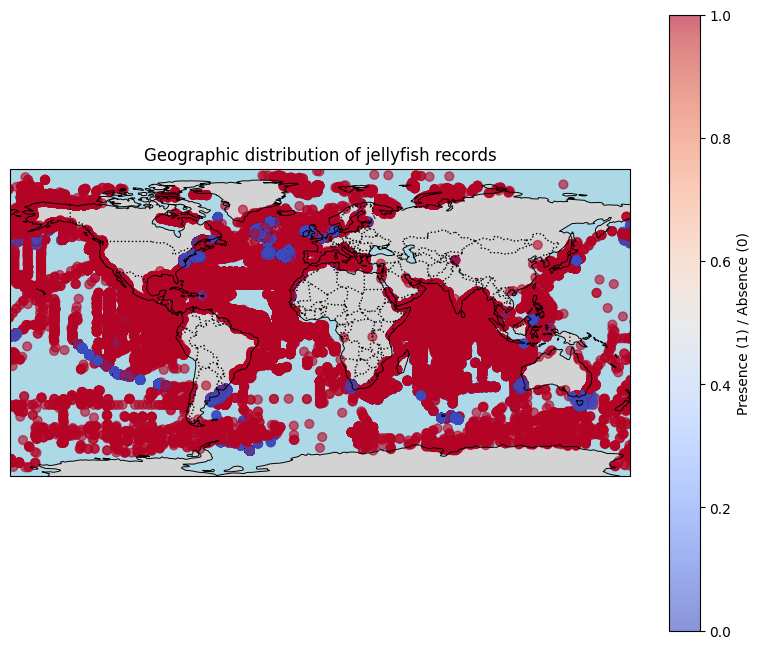

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load dataset
df = pd.read_csv("../data/JeDI.csv").replace("nd", pd.NA)
df["lat"] = pd.to_numeric(df["lat"], errors="coerce")
df["lon"] = pd.to_numeric(df["lon"], errors="coerce")

# Presence / absence as boolean (1=present, 0=absent)
df["present"] = df["presence_absence"].eq("present")

# --- Plot with Cartopy ---
plt.figure(figsize=(10,8))

# Use PlateCarree projection for lat/lon data
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([df["lon"].min()-5, df["lon"].max()+5,
               df["lat"].min()-5, df["lat"].max()+5],
              crs=ccrs.PlateCarree())

# Add base features
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Scatter the points
sc = ax.scatter(df["lon"], df["lat"],
                c=df["present"], cmap="coolwarm",
                alpha=0.6, s=40, transform=ccrs.PlateCarree())

# Add title + legend
plt.title("Geographic distribution of jellyfish records")
plt.colorbar(sc, ax=ax, label="Presence (1) / Absence (0)")
plt.show()


# PSSdb
https://github.com/jessluo/PSSdb/blob/main/raw/project_Zooscan_standardizer.xlsx


In [8]:
import requests
import pandas as pd

taxon_id = 1080   # Copepoda
url = "https://api.obis.org/v3/occurrence"

all_records = []
limit = 10000   # OBIS max per request
offset = 0

while True:
    params = {
        "taxonid": taxon_id,
        "size": limit,
        "from": offset
    }
    r = requests.get(url, params=params)
    r.raise_for_status()  # raise error if request fails
    data = r.json()

    results = data.get("results", [])
    if not results:
        break

    all_records.extend(results)
    offset += limit
    print(f"Fetched {len(all_records)} records so far...")

df = pd.DataFrame(all_records)
df.to_csv("copepods.csv", index=False)
print(f"✅ Saved {len(df)} copepod records to copepods.csv")
print(df.head())


Fetched 10000 records so far...
Fetched 20000 records so far...
Fetched 30000 records so far...
Fetched 40000 records so far...
Fetched 50000 records so far...
Fetched 60000 records so far...
Fetched 70000 records so far...
Fetched 80000 records so far...
Fetched 90000 records so far...
Fetched 100000 records so far...
Fetched 110000 records so far...
Fetched 120000 records so far...
Fetched 130000 records so far...
Fetched 140000 records so far...
Fetched 150000 records so far...
Fetched 160000 records so far...
Fetched 170000 records so far...
Fetched 180000 records so far...
Fetched 190000 records so far...
Fetched 200000 records so far...
Fetched 210000 records so far...
Fetched 220000 records so far...
Fetched 230000 records so far...
Fetched 240000 records so far...
Fetched 250000 records so far...
Fetched 260000 records so far...
Fetched 270000 records so far...
Fetched 280000 records so far...
Fetched 290000 records so far...
Fetched 300000 records so far...
Fetched 310000 reco

KeyboardInterrupt: 

In [32]:
import requests, pandas as pd

url = "https://api.obis.org/v3/occurrence?taxonid=1080&size=1000"
r = requests.get(url)
data = r.json()["results"]

df = pd.DataFrame(data)
print("Columns:", df.columns.tolist())
print(df.head()[["decimalLongitude","decimalLatitude","scientificName"]])


Columns: ['basisOfRecord', 'brackish', 'catalogNumber', 'class', 'classid', 'collectionCode', 'datasetID', 'datasetName', 'date_end', 'date_mid', 'date_start', 'date_year', 'day', 'decimalLatitude', 'decimalLongitude', 'eventDate', 'eventID', 'eventTime', 'family', 'familyid', 'footprintSRS', 'genus', 'genusid', 'geodeticDatum', 'infraclass', 'infraclassid', 'kingdom', 'kingdomid', 'lifeStage', 'marine', 'modified', 'month', 'occurrenceID', 'occurrenceStatus', 'order', 'orderid', 'phylum', 'phylumid', 'sampleSizeUnit', 'sampleSizeValue', 'scientificName', 'scientificNameID', 'species', 'speciesid', 'subphylum', 'subphylumid', 'superclass', 'superclassid', 'superorder', 'superorderid', 'year', 'id', 'dataset_id', 'node_id', 'dropped', 'absence', 'originalScientificName', 'aphiaID', 'flags', 'bathymetry', 'shoredistance', 'sst', 'sss', 'associatedMedia', 'depth', 'endDayOfYear', 'institutionCode', 'license', 'maximumDepthInMeters', 'minimumDepthInMeters', 'startDayOfYear', 'taxonRank', '

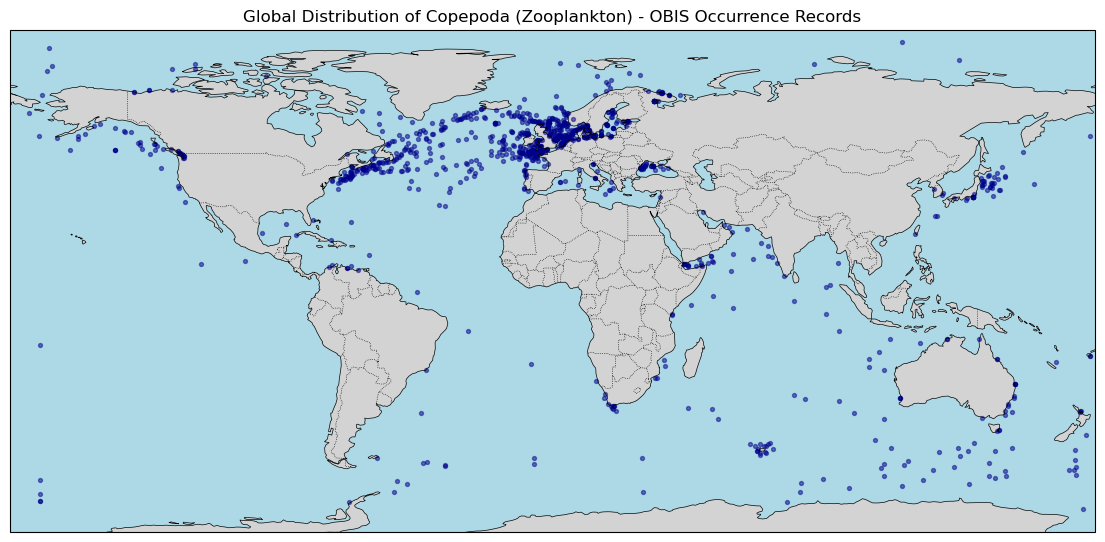

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Plot distribution of copepods
plt.figure(figsize=(14,7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add base layers
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.5)

# Scatter plot
sc = ax.scatter(
    df["decimalLongitude"], df["decimalLatitude"],
    c="darkblue", s=8, alpha=0.5,
    transform=ccrs.PlateCarree()
)

plt.title("Global Distribution of Copepoda (Zooplankton) - OBIS Occurrence Records")
plt.show()


In [13]:
print(df_co.columns.tolist())


['#']


In [17]:
import pandas as pd

# Inspect first 10 lines manually to find where header starts
with open("../data/projectPlankton/zooplankton.csv") as f:
    for i in range(10):
        print(i, f.readline().strip())


0 #
1 #  This data file is a COPEPOD planktgon group compilation.  ( Information on format and content are available at:  https://www.st.nmfs.noaa.gov/copepod/atlas )
2 #
3 #SHP-CRUISE,YEAR,MON,DAY,TIMEgmt,TIMEloc,LATITUDE,LONGITDE,UPPER_Z,LOWER_Z,T,GEAR,MESH,NMFS_PGC,ITIS_TSN,MOD,LIF,PSC,SEX,V,Water Strained,Original-VALUE,Orig-UNITS,VALUE-per-volu,UNITS,F1,F2,F3,F4,VALUE-per-area,UNITS,F1,F2,F3,F4,SCIENTIFIC NAME -[ modifiers ]-,RECORD-ID,DATASET-ID,SHIP,PROJ,INST,
4 #----------,----,---,---,-------,-------,--------,--------,-------,-------,-,----,----,--------,--------,---,---,---,---,-,--------------,--------------,----------,--------------,-----,--,--,--,--,--------------,-----,--,--,--,--,-------------------------------,---------,----------,----,----,----,
5 09GA-600202,1960,  2, 20, 22.580,  9.580, -12.470, 162.350, -999.9, -999.9,-, 116,-999, 4290000,   -7529,  0,  0,  0,  0,r,           null,        present, code/haul,            n/a, ----, 0, 0, 0,-1,            n/a, ----,-1,

Columns: ['#shp-cruise', 'year', 'mon', 'day', 'timegmt', 'timeloc', 'latitude', 'longitude', 'upper_z', 'lower_z', 't', 'gear', 'mesh', 'nmfs_pgc', 'itis_tsn']
Empty DataFrame
Columns: [year, mon, day, latitude, longitude]
Index: []
Number of records: 0


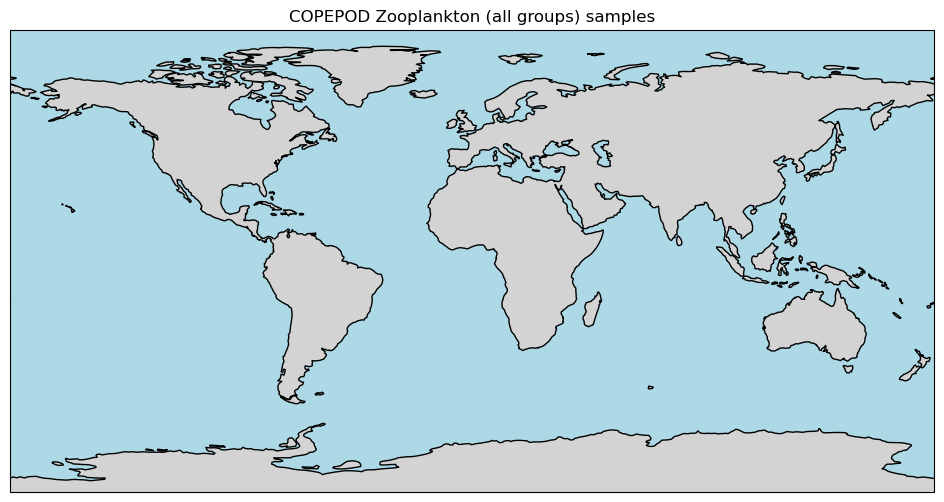

In [19]:
import pandas as pd

# Read with flexible parser and handle quoted scientific names
df_co = pd.read_csv(
    "../data/projectPlankton/zooplankton.csv",
    skiprows=3,          # skip metadata lines
    header=0,            # use the real header row
    engine="python",     # more forgiving parser
    quotechar='"',       # keep text inside quotes intact
    on_bad_lines="skip"  # skip malformed lines
)

# Standardize column names
df_co.columns = df_co.columns.str.strip().str.lower()

# Fix typo
df_co = df_co.rename(columns={"longitde": "longitude"})

# Remove dashed line rows
if "year" in df_co.columns:
    df_co = df_co[df_co["year"] != "----"]

# Convert key fields to numeric
for col in ["latitude", "longitude", "year", "mon", "day"]:
    if col in df_co.columns:
        df_co[col] = pd.to_numeric(df_co[col], errors="coerce")

# Drop rows without coordinates
df_co = df_co.dropna(subset=["latitude", "longitude"])

print("Columns:", df_co.columns.tolist()[:15])
print(df_co.head(3)[["year", "mon", "day", "latitude", "longitude"]])
print("Number of records:", len(df_co))



import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.add_feature(cfeature.COASTLINE)

ax.scatter(df_co["longitude"], df_co["latitude"], s=5, c="blue", alpha=0.3,
           transform=ccrs.PlateCarree())

plt.title("COPEPOD Zooplankton (all groups) samples")
plt.show()
